<a href="https://colab.research.google.com/github/rmogi/HousePrice/blob/master/mogi/HousePrices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
files.upload()

Saving sample_submission.csv to sample_submission.csv
Saving test.csv to test.csv
Saving train.csv to train.csv


{'sample_submission.csv': b'Id,SalePrice\n1461,169277.0524984\n1462,187758.393988768\n1463,183583.683569555\n1464,179317.47751083\n1465,150730.079976501\n1466,177150.989247307\n1467,172070.659229164\n1468,175110.956519547\n1469,162011.698831665\n1470,160726.247831419\n1471,157933.279456005\n1472,145291.245020389\n1473,159672.017631819\n1474,164167.518301885\n1475,150891.638244053\n1476,179460.96518734\n1477,185034.62891405\n1478,182352.192644656\n1479,183053.458213802\n1480,187823.339254278\n1481,186544.114327568\n1482,158230.77520516\n1483,190552.829321091\n1484,147183.67487199\n1485,185855.300905493\n1486,174350.470676986\n1487,201740.620690863\n1488,162986.378895754\n1489,162330.199085679\n1490,165845.938616539\n1491,180929.622876974\n1492,163481.501519718\n1493,187798.076714233\n1494,198822.198942566\n1495,194868.409899858\n1496,152605.298564403\n1497,147797.702836811\n1498,150521.96899297\n1499,146991.630153739\n1500,150306.307814534\n1501,151164.372534604\n1502,151133.706960953\n

In [34]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [138]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [139]:
# トレーニングデータの確認
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [140]:
# テストデータの確認
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [141]:
# トレーニングデータの変数の確認
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [142]:
# テストデータの変数の確認
test.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [143]:
# 目的変数である家の価格の要約統計量
train["SalePrice"].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

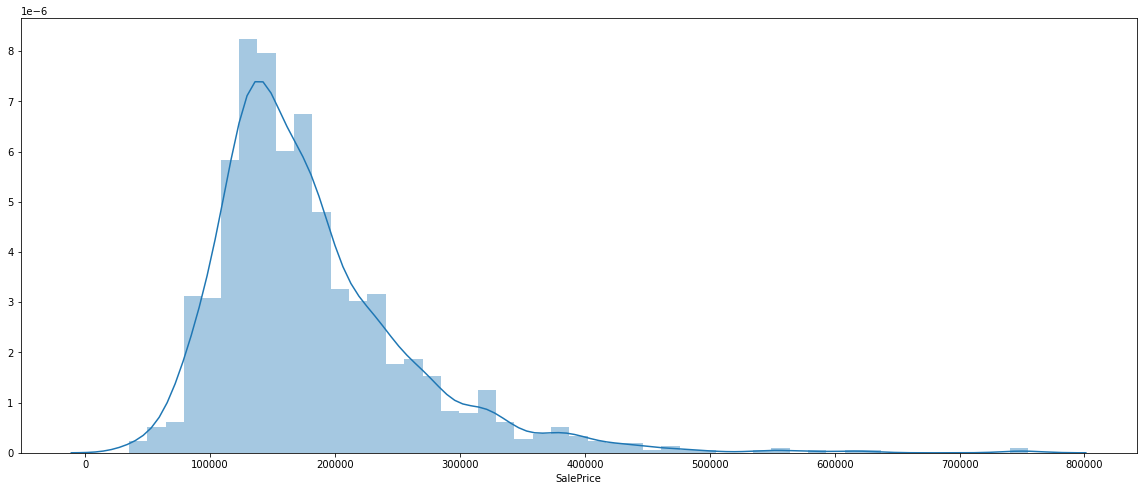

In [144]:
# 家の価格のヒストグラム
plt.figure(figsize=(20, 8), facecolor="w")
sns.distplot(train["SalePrice"])

In [145]:
# 歪度と尖度の計算
print("歪度: %f" % train["SalePrice"].skew())
print("尖度: %f" % train["SalePrice"].kurt())

歪度: 1.882876
尖度: 6.536282


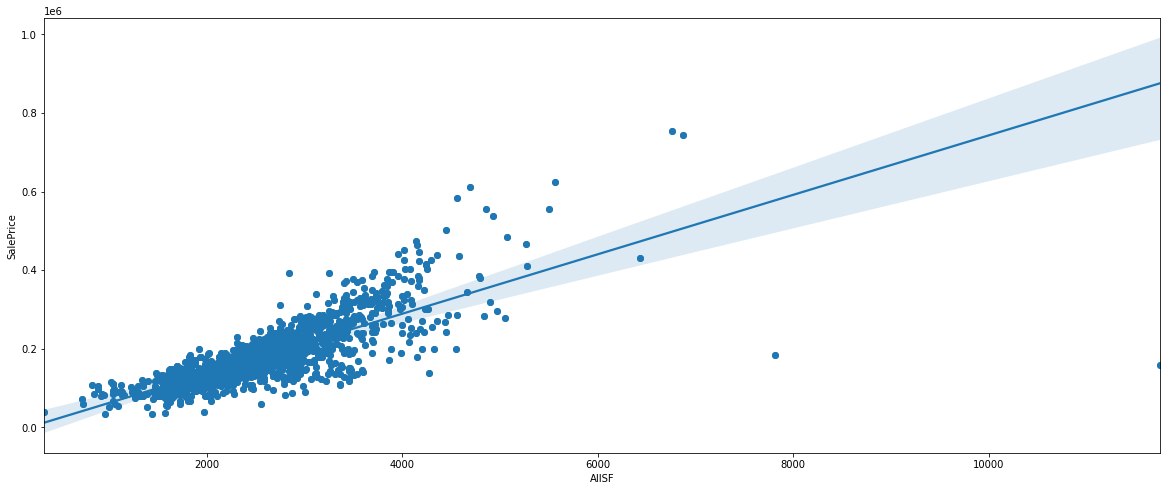

In [146]:
"""
1stFlrSF: 1階の広さ
2ndFlrSF: 2階の広さ
TotalBsmtSF: 地下の広さ
"""
# 物件の広さを合計した変数の作成
train["AllSF"] = train["1stFlrSF"] + train["2ndFlrSF"] + train["TotalBsmtSF"]
test["AllSF"] = test["1stFlrSF"] + test["2ndFlrSF"] + test["TotalBsmtSF"]

# 物件の広さと物件価格の散布図を作成
plt.figure(figsize=(20, 8), facecolor="w")
plt.scatter(train["AllSF"], train["SalePrice"])
plt.xlabel("AllSF")
plt.ylabel("SalePrice")
sns.regplot(x=train.AllSF, y=train.SalePrice)

若干外れ値はあるが、相関はしてる

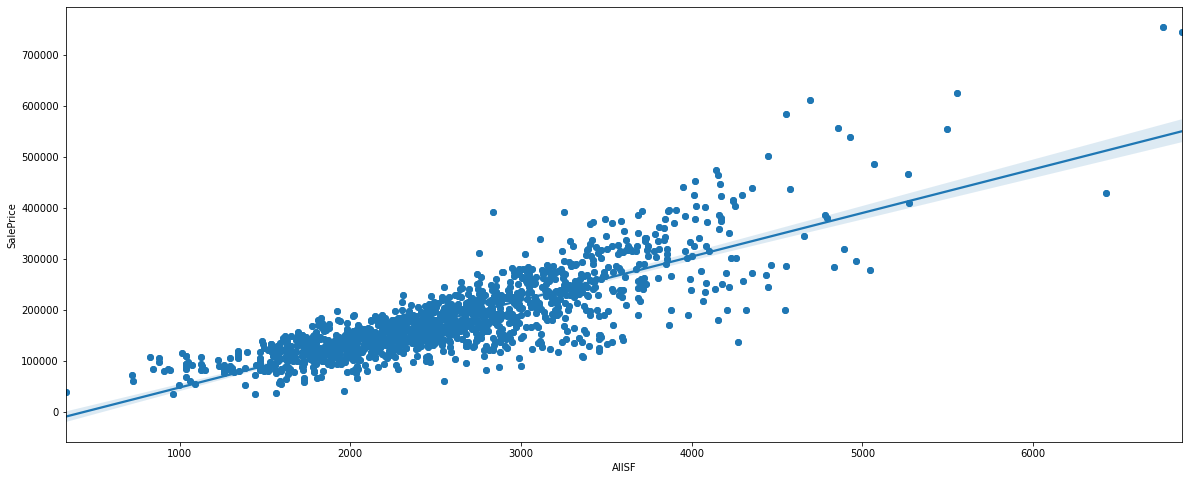

In [147]:
# 外れ値を除外
train = train.drop(train[(train["AllSF"]>7500) & (train["SalePrice"]<300000)].index)

# 物件の広さと物件価格の散布図を作成
plt.figure(figsize=(20, 8), facecolor="w")
plt.scatter(train["AllSF"], train["SalePrice"])
plt.xlabel("AllSF")
plt.ylabel("SalePrice")
sns.regplot(x=train.AllSF, y=train.SalePrice)

Text(0, 0.5, 'SalePrice')

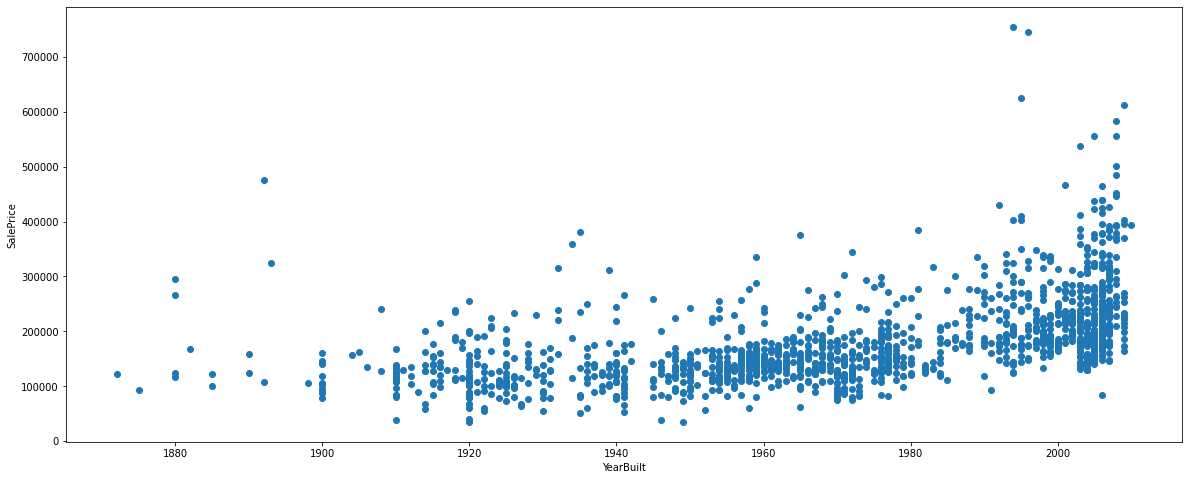

In [148]:
# 築年数と物件価格の散布図
plt.figure(figsize=(20, 8), facecolor="w")
plt.scatter(train["YearBuilt"], train["SalePrice"])
plt.xlabel("YearBuilt")
plt.ylabel("SalePrice")

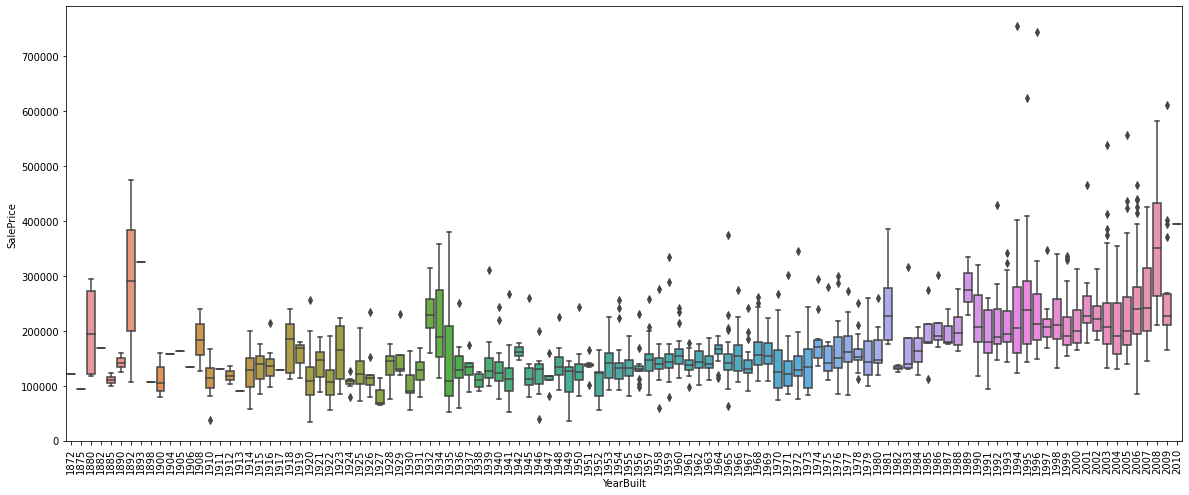

In [149]:
data = pd.concat([train["YearBuilt"], train["SalePrice"]], axis=1)

plt.figure(figsize=(20, 8), facecolor="w")
plt.xticks(rotation="90")
sns.boxplot(x="YearBuilt", y="SalePrice", data=data)

築年数が新しいほど部県価格が高い傾向がありそう。正直微妙

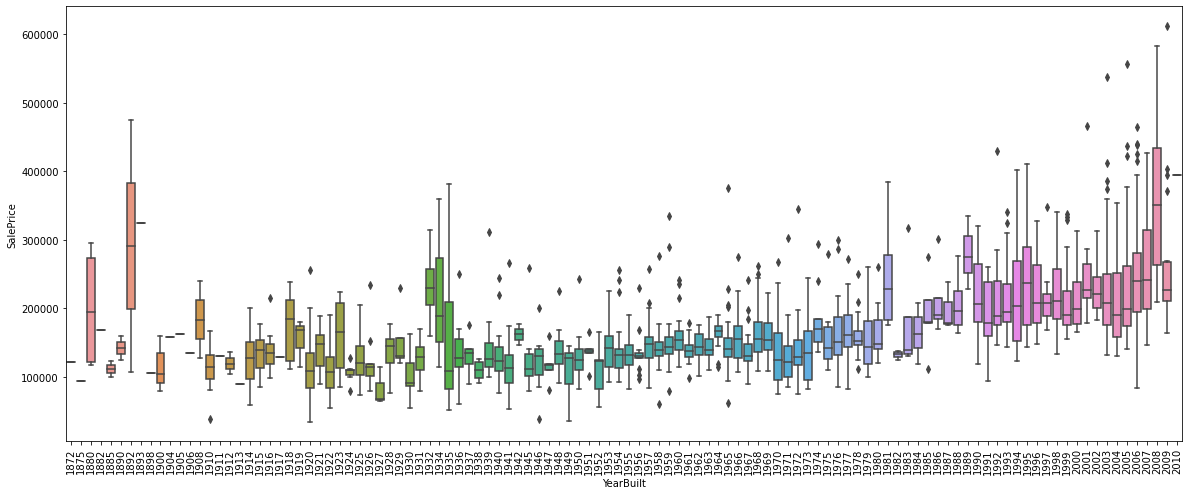

In [150]:
# 外れ値を除外
train = train.drop(train[(train["YearBuilt"]<2000) & (train["SalePrice"]>600000)].index)

# グラフの描画
data = pd.concat([train["YearBuilt"], train["SalePrice"]], axis=1)

plt.figure(figsize=(20, 8), facecolor="w")
plt.xticks(rotation="90")
sns.boxplot(x="YearBuilt", y="SalePrice", data=data)

Text(0, 0.5, 'SalePrice')

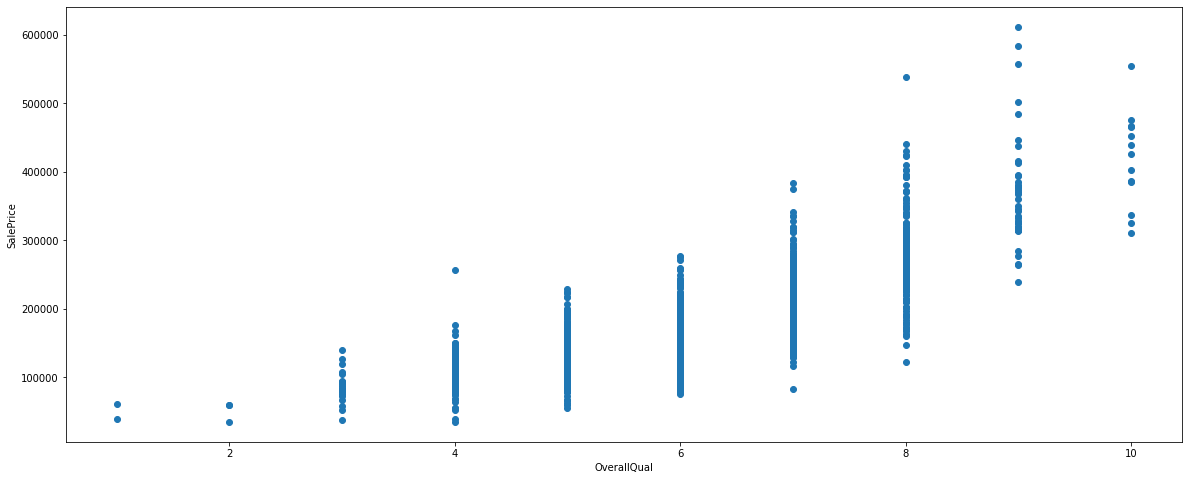

In [151]:
# 家の材料・完成度と物件価格の散布図を作成
plt.figure(figsize=(20, 8), facecolor="w")
plt.scatter(train["OverallQual"], train["SalePrice"])
plt.xlabel("OverallQual")
plt.ylabel("SalePrice")

Text(0, 0.5, 'SalePrice')

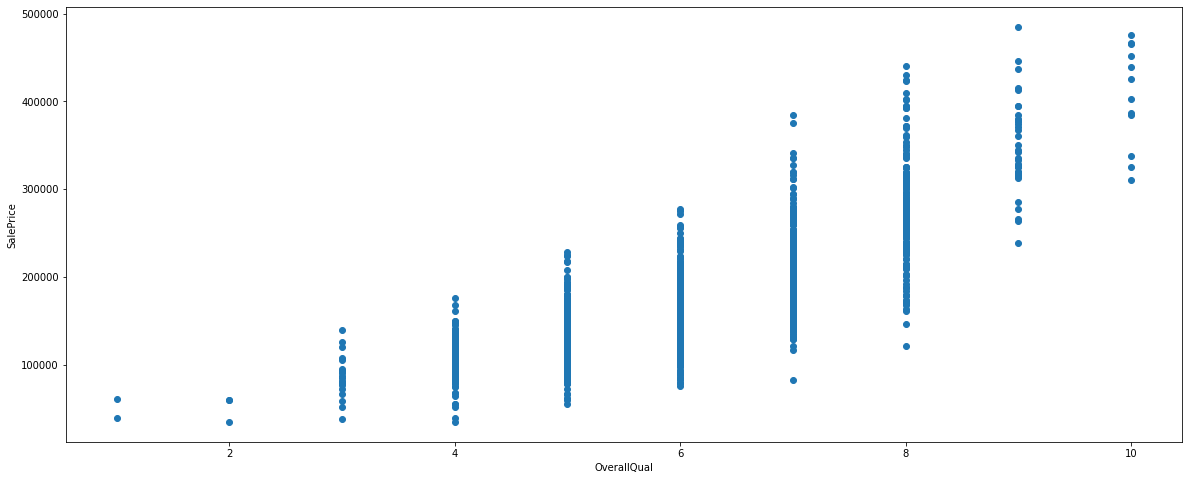

In [152]:
# 外れ値を除外
train = train.drop(train[(train["OverallQual"]<5) & (train["SalePrice"]>200000)].index)
train = train.drop(train[(train["OverallQual"]<=10) & (train["SalePrice"]>500000)].index)

# グラフを描画
plt.figure(figsize=(20, 8), facecolor="w")
plt.scatter(train["OverallQual"], train["SalePrice"])
plt.xlabel("OverallQual")
plt.ylabel("SalePrice")

In [153]:
# 学習データを目的変数とそれ以外に分ける
train_x = train.drop("SalePrice", axis=1)
train_y = train["SalePrice"]

In [154]:
# 学習データとテストデータを統合
all_data = pd.concat([train_x, test])

In [155]:
# IDのカラムは不必要なので別に経数に格納
train_ID = train["Id"]
test_ID = test["Id"]

all_data.drop("Id", axis=1, inplace=True)

In [156]:
# それぞれのデータサイズの確認
print("train_x:" + str(train_x.shape))
print("train_y:" + str(train_y.shape))
print("test:" + str(test.shape))
print("all_data:" + str(all_data.shape))

train_x:(1448, 81)
train_y:(1448,)
test:(1459, 81)
all_data:(2907, 80)


In [157]:
# データの欠損値を確認
all_data_na = all_data.isnull().sum()[all_data.isnull().sum()>0].sort_values(ascending=False)
all_data_na

PoolQC          2899
MiscFeature     2802
Alley           2709
Fence           2337
FireplaceQu     1420
LotFrontage      485
GarageCond       159
GarageQual       159
GarageFinish     159
GarageYrBlt      159
GarageType       157
BsmtCond          82
BsmtExposure      82
BsmtQual          81
BsmtFinType2      80
BsmtFinType1      79
MasVnrType        24
MasVnrArea        23
MSZoning           4
Functional         2
Utilities          2
BsmtHalfBath       2
BsmtFullBath       2
Exterior1st        1
Exterior2nd        1
AllSF              1
BsmtFinSF1         1
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
SaleType           1
KitchenQual        1
GarageCars         1
GarageArea         1
Electrical         1
dtype: int64

In [158]:
all_data_na.shape

(35,)

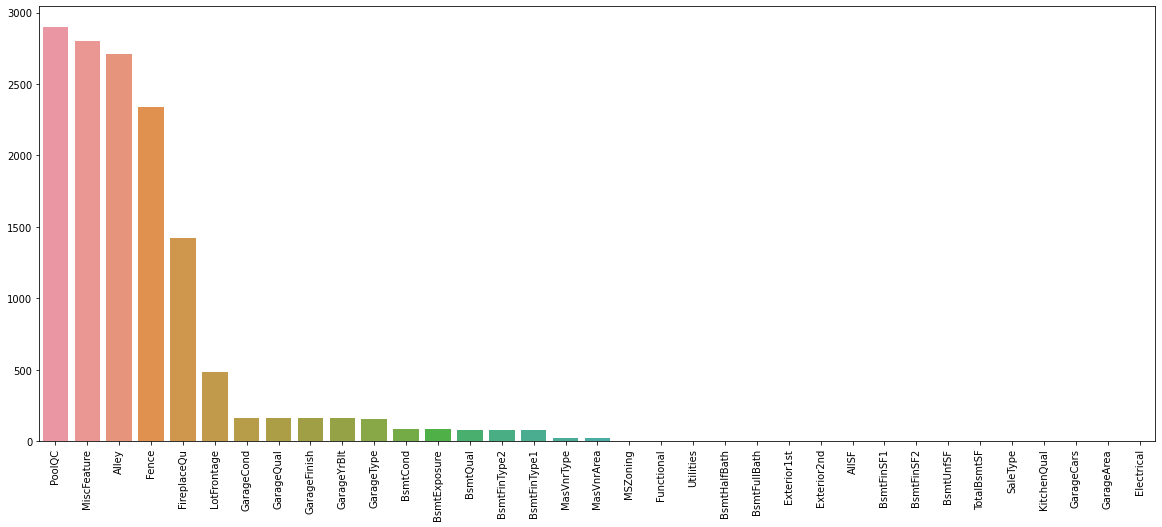

In [159]:
# 欠損値の数をグラフ化
plt.figure(figsize=(20, 8), facecolor="w")
plt.xticks(rotation="90")
sns.barplot(x=all_data_na.index, y=all_data_na)

PoolQC: Pool quality

備え付けられているプールの質を表す。プールがない場合にはNAとなる。

MiscFeature: Miscellaneous feature not covered in other categories

そのほかの備え付けられている設備を表す。エレベータやテニスコートなど。特にない場合はNAとなる。

Alley: Type of alley access to property

物件にアクセスするための道の種類（砂利なのか舗装されているのか）を表す。該当しない場合はNAとなる。

Fence: Fence quality
フェンスの質を表す。フェンスがない場合はNAとなる。

FireplaceQu: Fireplace quality

暖炉の品質を表す。暖炉がない場合はNAとなる。

LotFrontage: Linear feet of street connected to property

物件に連接した道路の長さ。

MSSubClass: ldentifies the type of dwelling involved in the sale

住宅の種類を表す。数値はどの種類に当てはまるかを表すだけで大きさや順序に意味はない。

YrSold: Year Sold(YYYY)

販売年

MoSold: Month Sold(MM)

販売月

In [160]:
# 欠損値があるカラムをリスト化
na_col_list = all_data.isnull().sum()[all_data.isnull().sum()>0].index.tolist()

# 欠損があるカラムのデータ型を確認
all_data[d_col_list].dtypes.sort_values()

AllSF           float64
LotFrontage     float64
BsmtFullBath    float64
TotalBsmtSF     float64
BsmtUnfSF       float64
BsmtFinSF2      float64
MasVnrArea      float64
GarageArea      float64
GarageCars      float64
BsmtHalfBath    float64
GarageYrBlt     float64
BsmtFinSF1      float64
FireplaceQu      object
GarageFinish     object
GarageQual       object
GarageCond       object
PoolQC           object
Fence            object
MiscFeature      object
GarageType       object
Functional       object
MSZoning         object
SaleType         object
BsmtFinType2     object
BsmtFinType1     object
BsmtExposure     object
BsmtCond         object
BsmtQual         object
MasVnrType       object
Exterior2nd      object
Exterior1st      object
Utilities        object
Alley            object
KitchenQual      object
Electrical       object
dtype: object

In [161]:
# 隣接した道路の長さ(LotFrontage)の欠損値の補完
all_data["lotFrontage"] = all_data.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))

# 欠損値が存在するかつfloat型のリストを作成
float_list = all_data[d_col_list].dtypes[all_data[d_col_list].dtypes == "float64"].index.tolist()

# 欠損値が存在するかつobject型のリストを作成
obj_list = all_data[d_col_list].dtypes[all_data[d_col_list].dtypes == "object"].index.tolist()

# float型の場合は欠損値を0で置換
all_data[float_list] = all_data[float_list].fillna(0)

# object型の場合は欠損値を"None"で置換
all_data[obj_list] = all_data[obj_list].fillna("None")

# 欠損値が全て置換できているかを確認
all_data.isnull().sum()[all_data.isnull().sum() > 0]

Series([], dtype: int64)

In [162]:
# カテゴリ変数に変換する
all_data["MSSubClass"] = all_data["MSSubClass"].apply(str)
all_data["YrSold"] = all_data["YrSold"].astype(str)
all_data["MoSold"] = all_data["MoSold"].astype(str)

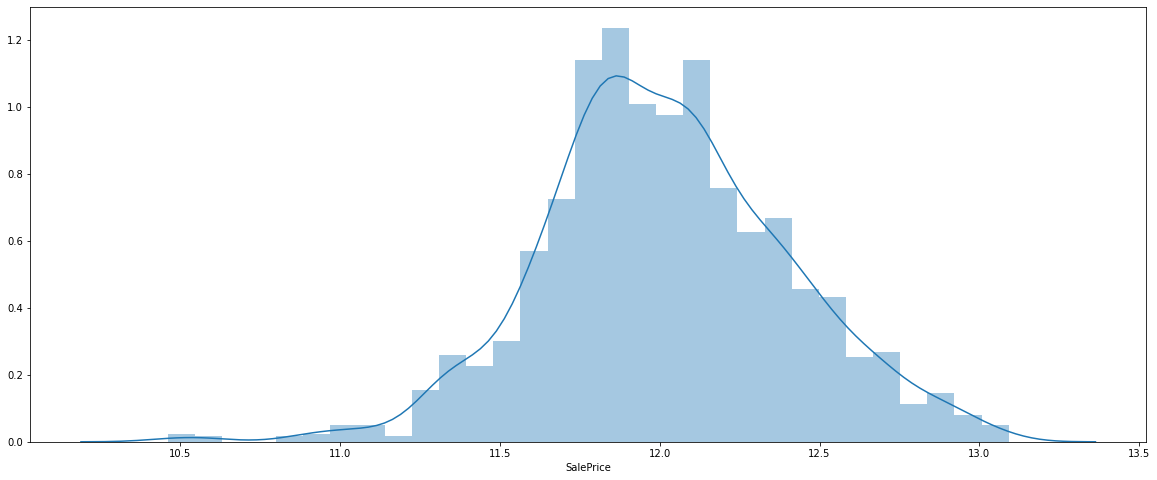

In [163]:
# 目的変数の対数log(x+1)をとる
train_y = np.log1p(train_y)

# 分布を可視化
plt.figure(figsize=(20, 8), facecolor="w")
sns.distplot(train_y)

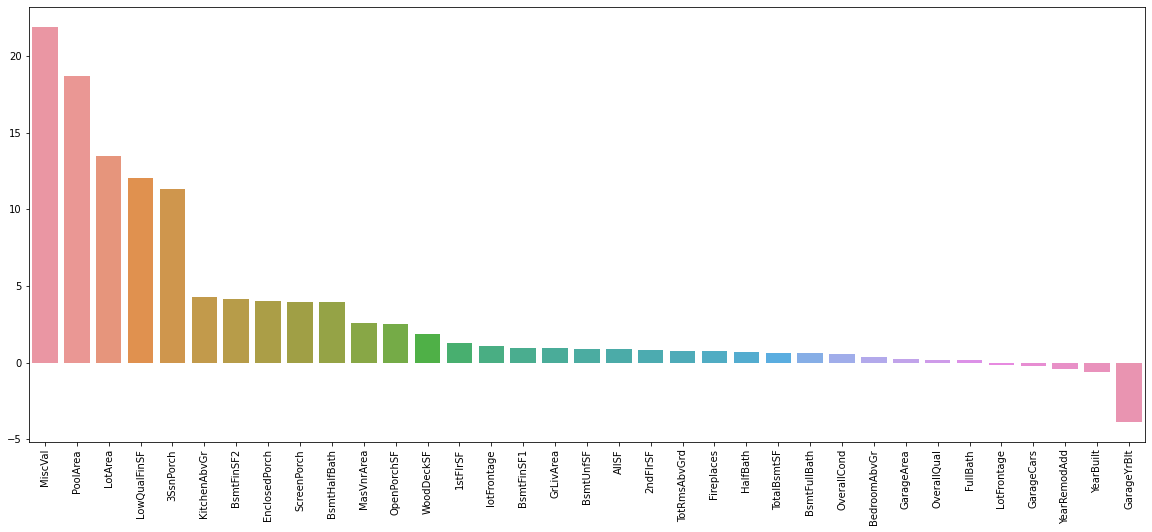

In [164]:
# 数値の説明変数のリストを作成
num_feats = all_data.dtypes[all_data.dtypes != "object"].index

# 各説明変数の歪度を計算
skewed_feats = all_data[num_feats].apply(lambda x: x.skew()).sort_values(ascending = False)

# グラフ化
plt.figure(figsize=(20, 8), facecolor="w")
plt.xticks(rotation="90")
sns.barplot(x=skewed_feats.index, y=skewed_feats)

In [165]:
# 歪度の絶対値が0.5より大きい変数だけに絞る
skewed_feats_over = skewed_feats[abs(skewed_feats) > 0.5].index

# 各変数の最小値を表示
for i in skewed_feats_over:
  print(min(all_data[i]))

0
0
1300
0
0
0
0.0
0
0
0.0
0.0
0
0
334
21.0
0.0
334
0.0
0.0
0
2
0
0
0.0
0.0
1
1872
0.0


Box-Cox変換は0以下の値を取る変数には使用できないため、0以下の値を持つ変数にも適用可能なYeo-Johnson変数を使用

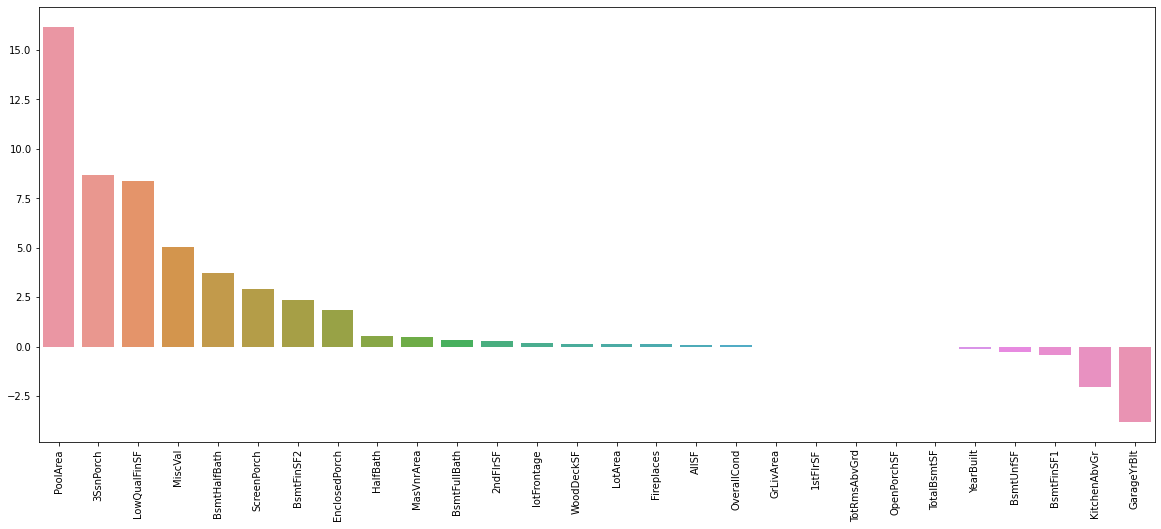

In [166]:
from sklearn.preprocessing import PowerTransformer

# Yeo-Johnson変数
pt = PowerTransformer()
pt.fit(all_data[skewed_feats_over])

# 変換後のデータでかく列を置換
all_data[skewed_feats_over] = pt.transform(all_data[skewed_feats_over])

# 各説明変数の歪度を計算
skewed_feats_fixed = all_data[skewed_feats_over].apply(lambda x: x.skew()).sort_values(ascending = False)

# グラフ化
plt.figure(figsize=(20, 8), facecolor="w")
plt.xticks(rotation="90")
sns.barplot(x=skewed_feats_fixed.index, y=skewed_feats_fixed)

In [167]:
# 特徴量に1部屋あたりの面積を追加
all_data["FeetPerRoom"] =  all_data["AllSF"]/all_data["TotRmsAbvGrd"]

# 建築した年とリフォームした年の合計
all_data["YearBuiltAndRemod"] = all_data["YearBuilt"] + all_data["YearRemodAdd"]

# バスルームの合計面積
all_data["Total_Bathrooms"] = (all_data["FullBath"] + (0.5 * all_data["HalfBath"]) +
                               all_data["BsmtFullBath"] + (0.5 * all_data["BsmtHalfBath"]))

# 縁側の合計面積
all_data["Total_porch_sf"] = (all_data["OpenPorchSF"] + all_data["3SsnPorch"] +
                              all_data["EnclosedPorch"] + all_data["ScreenPorch"] + 
                              all_data["WoodDeckSF"])

In [168]:
# 特徴量を追加

# プールの有無
all_data["haspool"] = all_data["PoolArea"].apply(lambda x: 1 if x > 0 else 0)

# 2階の有無
all_data["has2ndfloor"] = all_data["2ndFlrSF"].apply(lambda x: 1 if x > 0 else 0)

# ガレージの有無
all_data["hasgarage"] = all_data["GarageArea"].apply(lambda x: 1 if x > 0 else 0)

# 地下室の有無
all_data["hasbsmt"] = all_data["TotalBsmtSF"].apply(lambda x: 1 if x > 0 else 0)

# 暖炉の有無
all_data["hasfireplace"] = all_data["Fireplaces"].apply(lambda x: 1 if x > 0 else 0)

In [169]:
# 各カラムのデータ型を確認
all_data.dtypes.value_counts()

object     46
float64    35
int64       9
dtype: int64

In [170]:
# カテゴリ変数となっているカラムを取り出す
cal_list = all_data.dtypes[all_data.dtypes=="object"].index.tolist()

# 学習データにおけるカテゴリ変数のデータ数を確認
train_x[cal_list].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1448 entries, 0 to 1459
Data columns (total 46 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSSubClass     1448 non-null   int64 
 1   MSZoning       1448 non-null   object
 2   Street         1448 non-null   object
 3   Alley          91 non-null     object
 4   LotShape       1448 non-null   object
 5   LandContour    1448 non-null   object
 6   Utilities      1448 non-null   object
 7   LotConfig      1448 non-null   object
 8   LandSlope      1448 non-null   object
 9   Neighborhood   1448 non-null   object
 10  Condition1     1448 non-null   object
 11  Condition2     1448 non-null   object
 12  BldgType       1448 non-null   object
 13  HouseStyle     1448 non-null   object
 14  RoofStyle      1448 non-null   object
 15  RoofMatl       1448 non-null   object
 16  Exterior1st    1448 non-null   object
 17  Exterior2nd    1448 non-null   object
 18  MasVnrType     1440 non-null

In [171]:
# カテゴリ変数をget_dummiesによるone-hot-encodingを行う
all_data = pd.get_dummies(all_data, columns=cal_list)

# サイズを確認
all_data.shape

(2907, 350)

In [172]:
# 学習データとテストデータに再分割
train_x = all_data.iloc[:train_x.shape[0],:].reset_index(drop=True)
test = all_data.iloc[train_x.shape[0]:,:].reset_index(drop=True)

print("train_x:" + str(train_x.shape))
print("test:" + str(test.shape))

train_x:(1448, 350)
test:(1459, 350)


In [173]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
import lightgbm as lgb

In [174]:
# データを分割
train_x, valid_x, train_y, valid_y = train_test_split(
        train_x,
        train_y,
        test_size=0.3,
        random_state=0)

In [175]:
#特徴量と目的変数をxgboostのデータ構造に変換する
dtrain = xgb.DMatrix(train_x, label=train_y)
dvalid = xgb.DMatrix(valid_x,label=valid_y)

#パラメータを指定してGBDT
num_round = 5000
evallist = [(dvalid, 'eval'), (dtrain, 'train')]

evals_result = {}

#パラメータ
param = {
    'max_depth': 3,
    'eta': 0.01,
    'objective': 'reg:squarederror',
}

#学習の実行
bst = xgb.train(
    param, dtrain,
    num_round,
    evallist,
    evals_result=evals_result,
    early_stopping_rounds=1000
)

ストリーミング出力は最後の 5000 行に切り捨てられました。
[1]	eval-rmse:11.327	train-rmse:11.2794
[2]	eval-rmse:11.2144	train-rmse:11.1669
[3]	eval-rmse:11.103	train-rmse:11.0554
[4]	eval-rmse:10.9927	train-rmse:10.9451
[5]	eval-rmse:10.8835	train-rmse:10.8359
[6]	eval-rmse:10.7754	train-rmse:10.7278
[7]	eval-rmse:10.6684	train-rmse:10.6208
[8]	eval-rmse:10.5624	train-rmse:10.5148
[9]	eval-rmse:10.4575	train-rmse:10.4099
[10]	eval-rmse:10.3537	train-rmse:10.306
[11]	eval-rmse:10.2508	train-rmse:10.2032
[12]	eval-rmse:10.1491	train-rmse:10.1014
[13]	eval-rmse:10.0483	train-rmse:10.0007
[14]	eval-rmse:9.94854	train-rmse:9.90091
[15]	eval-rmse:9.84978	train-rmse:9.80214
[16]	eval-rmse:9.75201	train-rmse:9.70437
[17]	eval-rmse:9.65522	train-rmse:9.60758
[18]	eval-rmse:9.5594	train-rmse:9.51175
[19]	eval-rmse:9.46453	train-rmse:9.41688
[20]	eval-rmse:9.37062	train-rmse:9.32296
[21]	eval-rmse:9.27764	train-rmse:9.22998
[22]	eval-rmse:9.1856	train-rmse:9.13793
[23]	eval-rmse:9.09447	train-rmse:9.0468
[24]	eval-rmse:9.

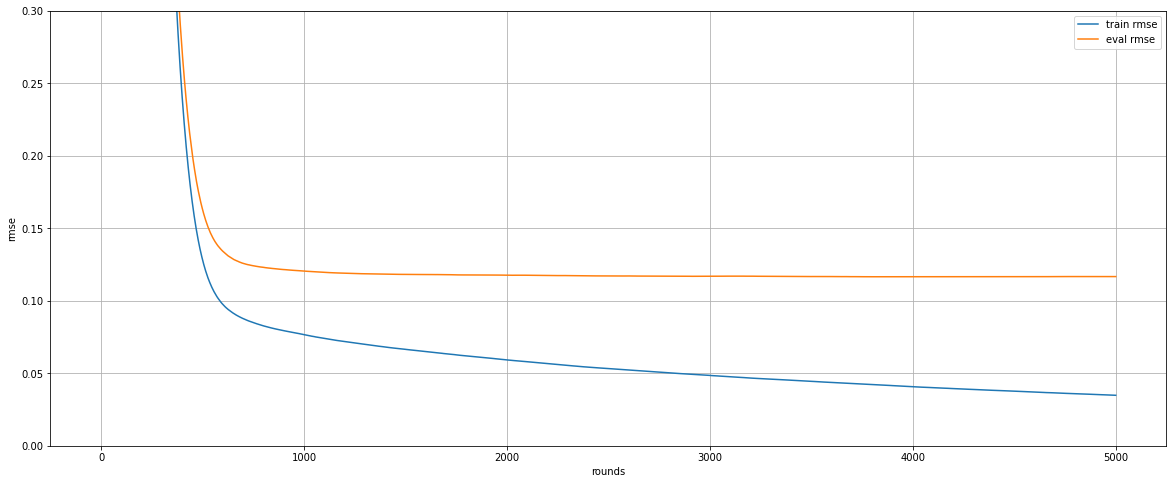

In [178]:
# 学習曲線を可視化する
plt.figure(figsize=(20, 8), facecolor="w")
train_metric = evals_result['train']['rmse']
plt.plot(train_metric, label='train rmse')
eval_metric = evals_result['eval']['rmse']
plt.plot(eval_metric, label='eval rmse')
plt.grid()
plt.legend()
plt.xlabel('rounds')
plt.ylabel('rmse')
plt.ylim(0, 0.3)
plt.show()

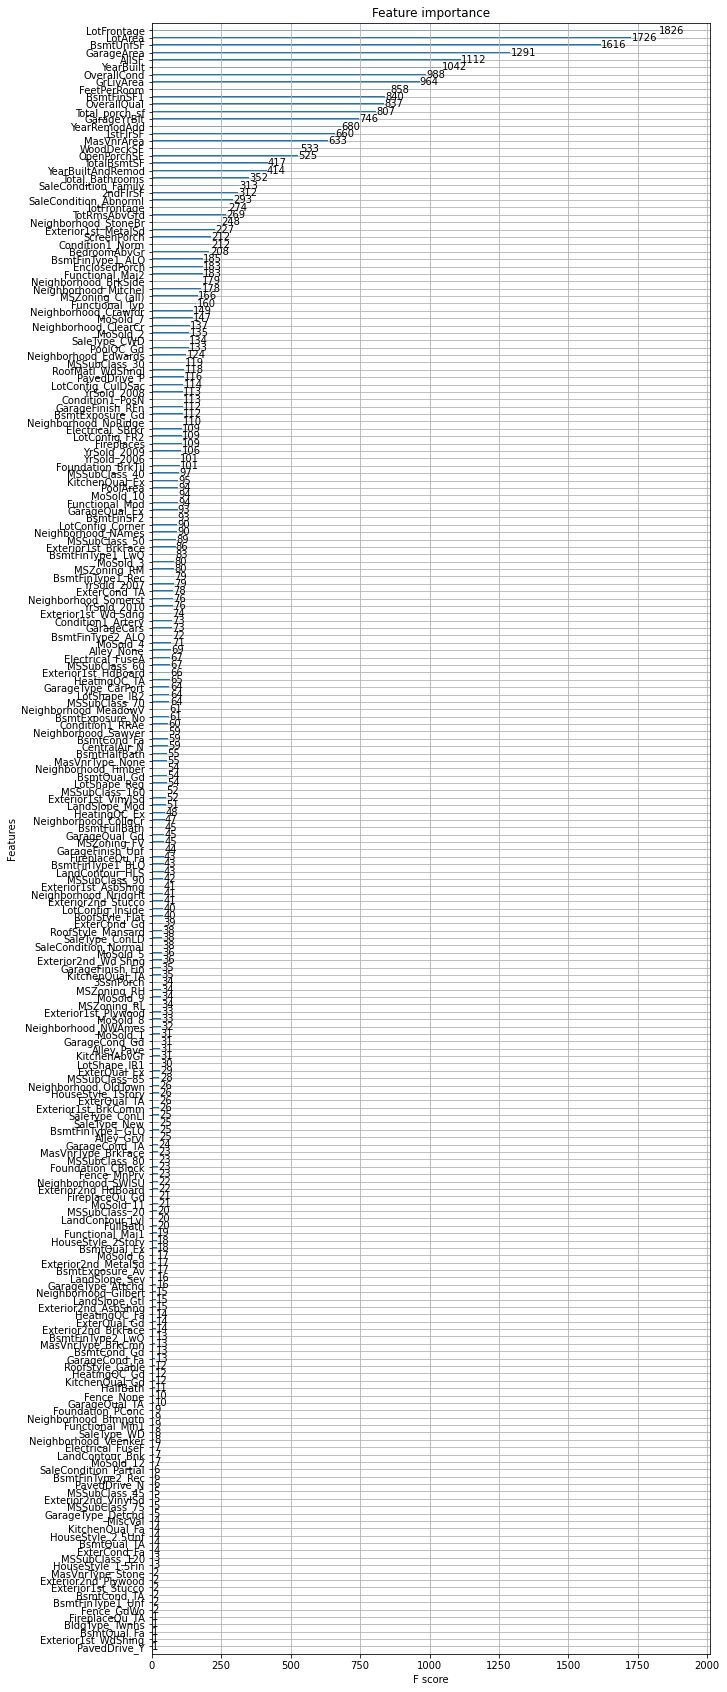

In [187]:
# 特徴量ごとの重要度を可視化する
ax = xgb.plot_importance(bst)
fig = ax.figure
fig.set_size_inches(10, 30)

In [200]:
dtest = xgb.DMatrix(test)
test1 = pd.DataFrame()
test1["Id"] = test_ID
test1["SalePrice"] = np.exp(bst.predict(dtest))
test1.to_csv("test1.csv", index=False)